In [100]:
# import all the modules I need
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('mode.chained_assignment', None)
%matplotlib inline
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

# import in the data table I downloaded from Kaggle
df = pd.DataFrame()
df = pd.read_csv("health_nutrition.csv")

df['Indicator Name'].unique()


array(['% of females ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)',
       '% of males ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)',
       'Adolescent fertility rate (births per 1,000 women ages 15-19)',
       'Adults (ages 15+) and children (0-14 years) living with HIV',
       'Adults (ages 15+) and children (ages 0-14) newly infected with HIV',
       'Adults (ages 15+) living with HIV',
       'Adults (ages 15+) newly infected with HIV',
       'Age at first marriage, female', 'Age at first marriage, male',
       'Age dependency ratio (% of working-age population)',
       'Age dependency ratio, old', 'Age dependency ratio, young',
       'Age population, age 0, female, interpolated',
       'Age population, age 0, male, interpolated',
       'Age population, age 01, female, interpolated',
       'Age population, age 01, male, interpolated',
       'Age popula

In [101]:
pd.options.display.max_rows = 999
pd.options.display.max_columns = 61

# narrow down countries and indicators to what I want to view
Countries = ['Philippines', 'United States']

df1= df[df['Country Name'].isin(Countries) &  df['Indicator Name'].apply(lambda x: 'female' in x)]
# drop the columns I don't want
df1 = df1.drop(['Country Code', 'Indicator Code', 'Unnamed: 60'], axis=1)
# melt the columns together so that I just have one column for year and a bunch of rows with specific indicators for every year 1960-2015
#dft = pd.melt(dft, id_vars=['Country Name', 'Indicator Name'], var_name='Year')
# rename columns and check what it looks like
df1.rename(columns={'Country Name': 'Country'}, inplace=True)
df1.rename(columns={'Indicator Name': 'Indicator'}, inplace=True)
df1 = df1[['Country', 'Indicator', '2012']]
df1.groupby('Indicator')['2012'].count()

Indicator
% of females ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)    0
Age at first marriage, female                                                                                            0
Age population, age 0, female, interpolated                                                                              2
Age population, age 01, female, interpolated                                                                             2
Age population, age 02, female, interpolated                                                                             2
Age population, age 03, female, interpolated                                                                             2
Age population, age 04, female, interpolated                                                                             2
Age population, age 05, female, interpolated                                                                             2
Age po

In [102]:
Indicators_keep = ['School enrollment, tertiary, female (% gross)', 'Sex ratio at birth (male births per female births)',
                   'Smoking prevalence, females (% of adults)', 'Survival to age 65, female (% of cohort)', 'Unemployment, female (% of female labor force)']
df2 = df1[df1['Indicator'].isin(
    Indicators_keep)]
df3 = df2.pivot(index = 'Country', columns = 'Indicator', values = '2012')
df3 = df3.reset_index()
df3

Indicator,Country,"School enrollment, tertiary, female (% gross)",Sex ratio at birth (male births per female births),"Smoking prevalence, females (% of adults)","Survival to age 65, female (% of cohort)","Unemployment, female (% of female labor force)"
0,Philippines,34.548000,1.060,9.2,75.97955,6.9
1,United States,111.454269,1.048,16.3,87.93485,8.0


In [103]:
df3['Country_categorical'] = pd.get_dummies(df3['Country'], drop_first=True)
df3['School_enrollment_inverval'] = df3['School enrollment, tertiary, female (% gross)'].apply(lambda x: x >50)
df3

Indicator,Country,"School enrollment, tertiary, female (% gross)",Sex ratio at birth (male births per female births),"Smoking prevalence, females (% of adults)","Survival to age 65, female (% of cohort)","Unemployment, female (% of female labor force)",Country_categorical,School_enrollment_inverval
0,Philippines,34.548000,1.060,9.2,75.97955,6.9,0,False
1,United States,111.454269,1.048,16.3,87.93485,8.0,1,True


Indicator                                           School enrollment, tertiary, female (% gross)  \
Indicator                                                                                           
School enrollment, tertiary, female (% gross)                                                 1.0   
Sex ratio at birth (male births per female births)                                           -1.0   
Smoking prevalence, females (% of adults)                                                     1.0   
Survival to age 65, female (% of cohort)                                                      1.0   
Unemployment, female (% of female labor force)                                                1.0   
life                                                                                          1.0   

Indicator                                           Sex ratio at birth (male births per female births)  \
Indicator                                                                            

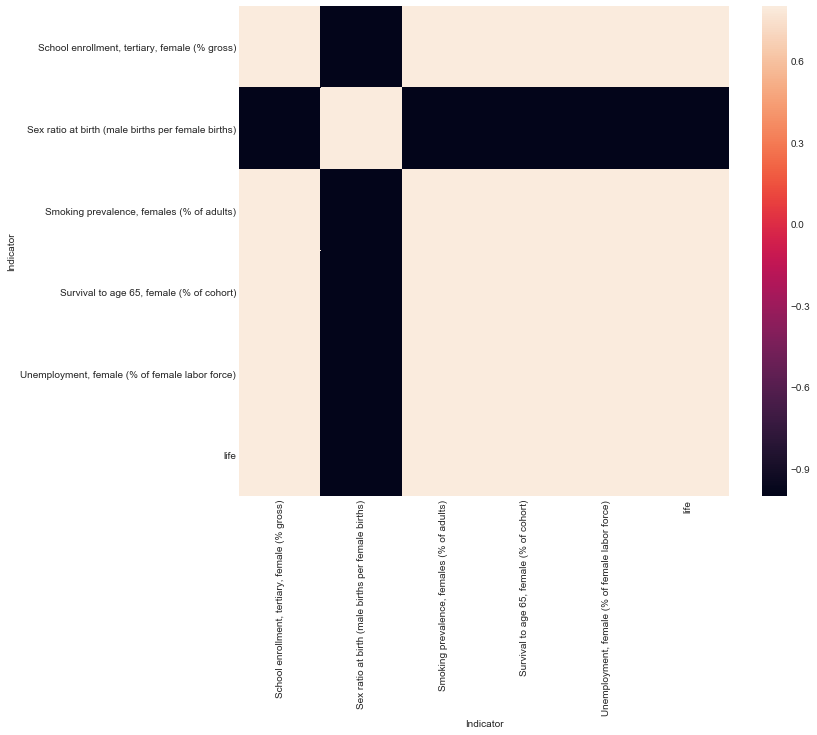

In [110]:
# Let's make some averages. Just in case some of the variables are on
# different scales than others. we scale them before averaging by subtracting the average of
# each variable from all values in that variable, then dividing by the
# standard deviation.
means = df3[['School enrollment, tertiary, female (% gross)', 'Sex ratio at birth (male births per female births)',
            'Smoking prevalence, females (% of adults)', 'Survival to age 65, female (% of cohort)', 'Unemployment, female (% of female labor force)']].mean(axis=0)
stds = df3[['School enrollment, tertiary, female (% gross)', 'Sex ratio at birth (male births per female births)',
            'Smoking prevalence, females (% of adults)', 'Survival to age 65, female (% of cohort)', 'Unemployment, female (% of female labor force)']].std(axis=0)
features['life'] = ((df3[['School enrollment, tertiary, female (% gross)', 'Sex ratio at birth (male births per female births)',
            'Smoking prevalence, females (% of adults)', 'Survival to age 65, female (% of cohort)', 'Unemployment, female (% of female labor force)']] - means) / stds).mean(axis=1)

# Check how well the composite correlates with each of the individual variables.
plotdf = df3.loc[:, ['School enrollment, tertiary, female (% gross)', 'Sex ratio at birth (male births per female births)',
            'Smoking prevalence, females (% of adults)', 'Survival to age 65, female (% of cohort)', 'Unemployment, female (% of female labor force)']]
plotdf['life'] = features['life']
corrmat2 = plotdf.corr()

print(corrmat2)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat2, vmax=.8, square=True)
plt.show()

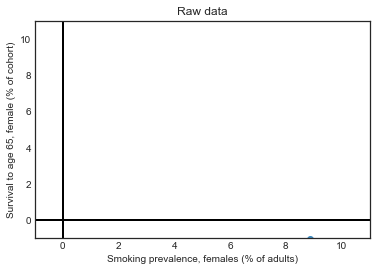

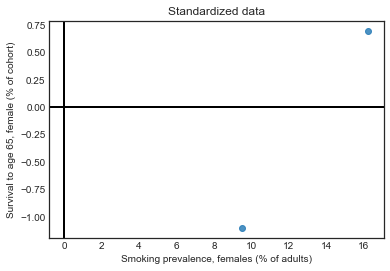

In [120]:
# Make the scatterplot matrix.

# Setting the default plot aesthetics to be prettier.
sns.set_style("white")

t = sns.regplot('Smoking prevalence, females (% of adults)', 'Survival to age 65, female (% of cohort)',
                df3,
                x_jitter=.49,
                y_jitter=.49,
                fit_reg=False
                )
t.set(xlim=(-1, 11), ylim=(-1, 11))
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Raw data')
plt.show()

# Standardizing variables by subtracting the mean and dividing by the standard
# deviation. Now both variables are on the same scale.
df3['Smoking prevalence, females (% of adults)_z'] = (df3['Smoking prevalence, females (% of adults)'] -
                       df3['Smoking prevalence, females (% of adults)'].mean()) / df3['Smoking prevalence, females (% of adults)'].std()
df3['Survival to age 65, female (% of cohort)_z'] = (df3['Survival to age 65, female (% of cohort)'] -
                       df3['Survival to age 65, female (% of cohort)'].mean()) / df3['Survival to age 65, female (% of cohort)'].std()

t = sns.regplot('Smoking prevalence, females (% of adults)', 'Survival to age 65, female (% of cohort)',
                df3,
                x_jitter=.49,
                y_jitter=.49,
                fit_reg=False
                )
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standardized data')
plt.show()

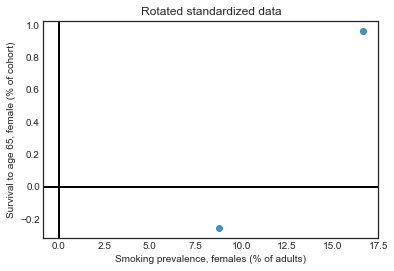

In [121]:
# Rotating the data so that the axes roughly match to vector above.
df3['Smoking prevalence, females (% of adults)_z_rot'] = math.cos(40) * df3['Smoking prevalence, females (% of adults)_z'] - math.sin(40) * df3['Survival to age 65, female (% of cohort)_z']
df3['Survival to age 65, female (% of cohort)_z_rot'] = math.sin(40) * df3['Smoking prevalence, females (% of adults)_z'] + math.cos(40) * df3['Survival to age 65, female (% of cohort)_z']


t = sns.regplot('Smoking prevalence, females (% of adults)', 'Survival to age 65, female (% of cohort)',
                df3,
                x_jitter=.49,
                y_jitter=.49,
                fit_reg=False
                )
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Rotated standardized data')
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


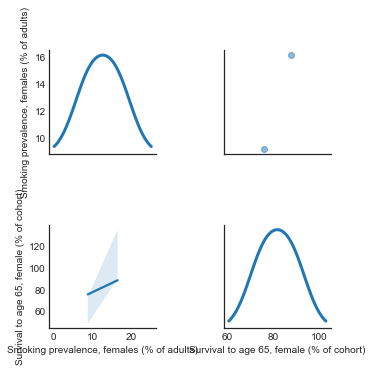

In [108]:
# Make the scatterplot matrix
# Set the default plot aesthetics to be prettier.
sns.set_style("white")

df_jittered = df3.loc[:,  'Smoking prevalence, females (% of adults)':'Survival to age 65, female (% of cohort)'].dropna()
# Making the random noise.
jitter = pd.DataFrame(
    np.random.uniform(-.3, .3, size=(df_jittered.shape)),
    columns=df_jittered.columns
)
# Combine the data and the noise.
df_jittered = df_jittered.add(jitter)

# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(df_jittered.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

# Look at other indicators

In [105]:
pd.options.display.max_rows = 999
pd.options.display.max_columns = 61

# looking at other indicators
Countries = ['Philippines', 'United States']
Indicators = ['Life expectancy at birth, total (years)', 'Rural population (% of total population)',
              'Survival to age 65, female (% of cohort)', 'Survival to age 65, male (% of cohort)']
dft = df[df['Indicator Name'].isin(
    Indicators) & df['Country Name'].isin(Countries)]
# drop the columns I don't want
dft = dft.drop(['Country Code', 'Indicator Code', 'Unnamed: 60'], axis=1)
# melt the columns together so that I just have one column for year and a bunch of rows with specific indicators for every year 1960-2015
dft = pd.melt(dft, id_vars=['Country Name', 'Indicator Name'], var_name='Year')
# rename columns and check what it looks like
dft.rename(columns={'Country Name': 'Country'}, inplace=True)
dft.rename(columns={'Indicator Name': 'Indicator'}, inplace=True)
dft.head(n = 440)

,Country,Indicator,Year,value
0,Philippines,"Life expectancy at birth, total (years)",1960,57.811927
1,Philippines,Rural population (% of total population),1960,69.703000
2,Philippines,"Survival to age 65, female (% of cohort)",1960,57.193910
3,Philippines,"Survival to age 65, male (% of cohort)",1960,51.216730
4,United States,"Life expectancy at birth, total (years)",1960,69.770732
5,United States,Rural population (% of total population),1960,30.004000
6,United States,"Survival to age 65, female (% of cohort)",1960,78.245750
7,United States,"Survival to age 65, male (% of cohort)",1960,63.959900
8,Philippines,"Life expectancy at birth, total (years)",1961,58.122268
9,Philippines,Rural population (% of total population),1961,69.445000


In [106]:
dft2 = dft.pivot_table(index=['Country','Year'], columns='Indicator')
dft2

value  \
Indicator          Life expectancy at birth, total (years)   
Country       Year                                           
Philippines   1960                               57.811927   
              1961                               58.122268   
              1962                               58.428854   
              1963                               58.732610   
              1964                               59.033073   
              1965                               59.333268   
              1966                               59.636244   
              1967                               59.942122   
              1968                               60.245463   
              1969                               60.540341   
              1970                               60.813244   
              1971                               61.046171   
              1972                               61.231098   
              1973                               61.368976   
              1974                               61.465341   
              1975                               61.536195   
              1976                               61.599585   
              1977                               61.677512   
              1978                               61.790000   
              1979                               61.945585   
              1980                               62.154756   
              1981                               62.421024   
              1982                               62.732415   
              1983                               63.073390   
              1984                               63.433439   
              1985                               63.798561   
              1986                               64.153732   
              1987                               64.487927   
              1988                               64.791634   
              1989                               65.059366   
              1990                               65.288073   
              1991                               65.481268   
              1992                               65.648463   
              1993                               65.799659   
              1994                               65.938854   
              1995                               66.070561   
              1996                               66.197756   
              1997                               66.321463   
              1998                               66.442171   
              1999                               66.561902   
              2000                               66.682122   
              2001                               66.802390   
              2002                               66.921659   
              2003                               67.038927   
              2004                               67.154195   
              2005                               67.266488   
              2006                               67.374756   
              2007                               67.479024   
              2008                               67.580780   
              2009                               67.681049   
              2010                               67.783317   
              2011                               67.890659   
              2012                               68.007073   
              2013                               68.131561   
              2014                               68.265634   
              2015                                     NaN   
United States 1960                               69.770732   
              1961                               70.270732   
              1962                               70.119512   
              1963                               69.917073   
              1964                               70.165854   
              1965                               70.214634   
              1966     

Explore the variables using the univariate and bivariate methods you've learned so far.

Next, based on what you learned via your data exploration, create ten new features. Explain the reasoning behind each one.

Finally, use filtering methods to select the five best features and justify your choices.

# Univariate 
How many variables do I have? Cont/categorical?
- I'm looking at 4 continuous variables ('Life expectancy at birth, total (years)', 'Rural population (% of total population)',
              'Survival to age 65, female (% of cohort)', 'Survival to age 65, male (% of cohort)') and 2 categorical variables (country and year)
How many datapoints?
- I have 220 data points per country

Do any of my variables have a known probability distribution (normal, Poisson, Gamma, etc)?
- I'm not sure what the probability distribution might be.

Do I have missing data? If so, how much?
- I have 3 points of missing data from 2015.

# Bivariate
Make a scatter plot matrix!

                                                                                 value  \
Indicator                                      Life expectancy at birth, total (years)   
      Indicator                                                                          
value Life expectancy at birth, total (years)                                 1.000000   
      Rural population (% of total population)                               -0.960090   
      Survival to age 65, female (% of cohort)                                0.991406   
      Survival to age 65, male (% of cohort)                                  0.977088   

                                                                                         \
Indicator                                      Rural population (% of total population)   
      Indicator                                                                           
value Life expectancy at birth, total (years)                                 -0.960090   
     

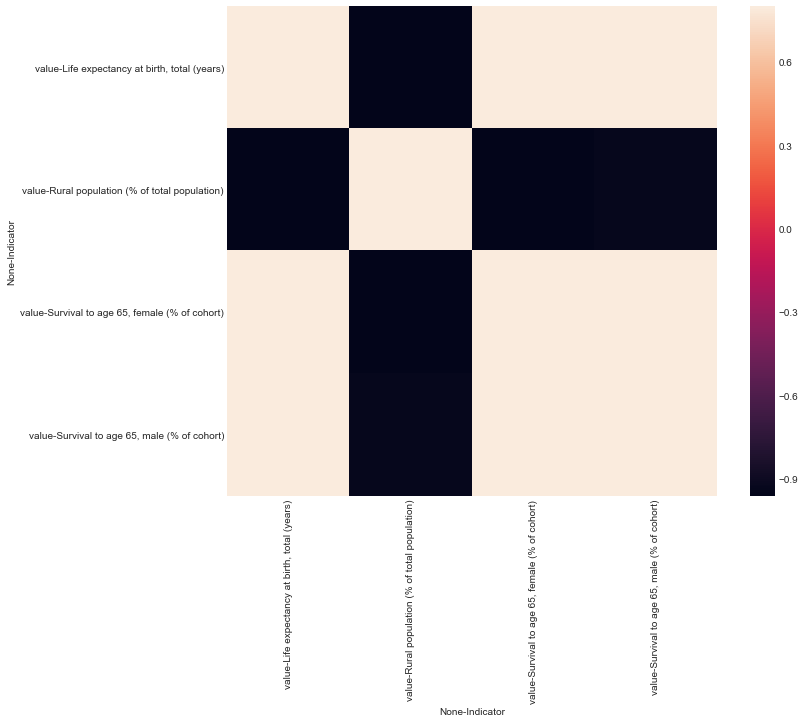

In [109]:
# Make the correlation matrix.
corrmat = dft2.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

c:\users\tiani\appdata\local\programs\python\python36-32\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


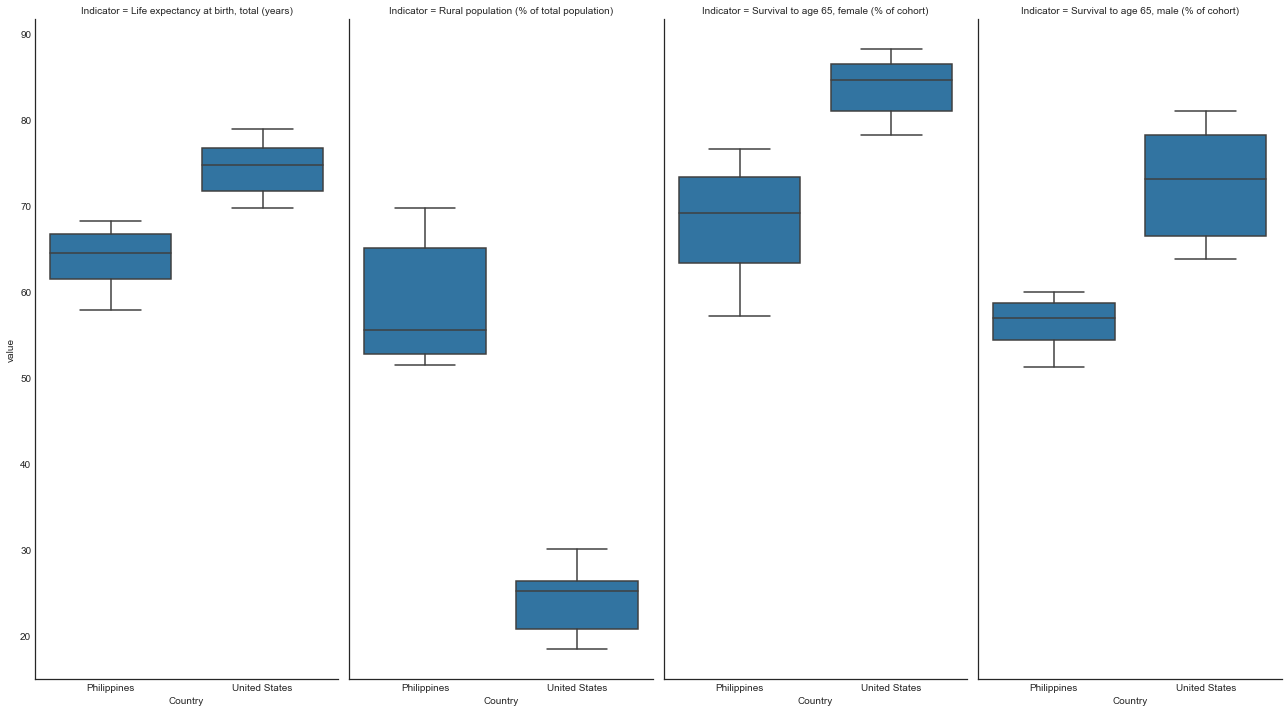

                                                value                       \
Indicator     Life expectancy at birth, total (years)                        
                                                count       mean       std   
Country                                                                      
Philippines                                      55.0  63.894835  3.164257   
United States                                    55.0  74.461774  2.895459   

                                                                      \
Indicator                                                              
                     min        25%        50%        75%        max   
Country                                                                
Philippines    57.811927  61.417159  64.487927  66.742256  68.265634   
United States  69.770732  71.656098  74.765854  76.736585  78.941463   

                                                                             \
Indicator     Rural

In [85]:
# Plot all the variables with boxplots for each country.

g = sns.FacetGrid(dft, col="Indicator", size=10, aspect=0.45)
g = g.map(sns.boxplot, "Country", "value")
plt.show()

# Descriptive statistics by group.
print(dft2.groupby('Country').describe())

# Test whether group differences are significant.
for col in dft2.loc[:,'Life expectancy at birth, total (years)':'Survival to age 65, male (% of cohort)'].columns:
    print(col)
    print(stats.ttest_ind(
        dft2[dft2['Country'] == 'Philippines'][col].dropna(),
        dft2[dft2['Country'] == 'United States'][col].dropna()
    ))

# Create New Features

In [84]:
df['Country Name'].unique()

array(['Arab World', 'Caribbean small states',
       'Central Europe and the Baltics', 'Early-demographic dividend',
       'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)',
       'East Asia & Pacific (IDA & IBRD countries)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)',
       'Europe & Central Asia (IDA & IBRD countries)', 'European Union',
       'Fragile and conflict affected situations',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'Late-demographic dividend', 'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Latin America & the Caribbean (IDA & IBRD countries)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)',
       'Middle East & North Africa (IDA & IBRD c

In [87]:
# Making dummies.
# Also creating a data frame to hold our features.
features = pd.get_dummies(df['Country Name'])

# American countries dummy.
features['American'] = np.where((df['Country Name'].isin(['United States', 'Samoa', 'Guam', 'Puerto Rico', 'Virgin Islands (U.S.)'])), 1, 0)

print(pd.crosstab(features['American'], df['Country Name']))

Country Name  Afghanistan  Albania  Algeria  American Samoa  Andorra  Angola  \
American                                                                       
0                     345      345      345             345      345     345   
1                       0        0        0               0        0       0   

Country Name  Antigua and Barbuda  Arab World  Argentina  Armenia  Aruba  \
American                                                                   
0                             345         345        345      345    345   
1                               0           0          0        0      0   

Country Name  Australia  Austria  Azerbaijan  Bahamas, The  Bahrain  \
American                                                              
0                   345      345         345           345      345   
1                     0        0           0             0        0   

Country Name  Bangladesh  Barbados  Belarus  Belgium  Belize  Benin  Bermuda  \
American 

In [98]:
features['Ppl_my_age_or_lower'] = np.where(lambda x: x.float(dft['Year'])>=1994, 1, 0)

# Check to make sure it worked.
print(dft['Year'].groupby(features['Ppl_my_age_or_lower']).describe())

                    count unique   top freq
Ppl_my_age_or_lower                        
1                     448     56  1965    8
